 # **4.10 Final Instacart Report Part 1**

## _Contents_

#### 1. Libaries and Data 

#### 2. Security Implications / PII Data

#### 3. Customer Behavior in different Geographic Areas

#### 4. Detecting Low-Activity Customers / Low Revenue 

#### 5. Marketing & Business: Customer Profiling

#### 6. Visualisation of Profiles

#### 7. Aggregation / Customer-Profiles

#### 8. Comparing Customer Profiles with Regions

#### 9. Illustration of Results




## _Script_

## 1. Libaries and Data 

Firstly I am loading all necessary libaries as well as the dataset.

In [1]:
#import libaries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# defining path
path = r'C:\Users\tinar\Dokumente PC\00 DATA ANALYST Carrer Foundry\04 Immersion Course\4. Python Fundamentals for Data Analysts\2209 Instacart Basket Analysis'

In [5]:
# import of orders_products_customers
ords_prods_custo = pd.read_pickle(os.path.join(path, '02 Data', '02 Prepared Data', 'instacart_data_complete.pkl'))

In [7]:
# correcting a spelling mistake in "family_members"
ords_prods_custo.rename(columns = {'familiy_members' : 'family_members'}, inplace = True)

In [8]:
# adjusting the varibale name
ords_prods_custo.rename(columns = {'fam_status' : 'family_status'}, inplace = True)

In [9]:
ords_prods_custo.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,family_members,family_status,income
0,2539329,1,1,2,8,11.11484,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.00000,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.00000,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.00000,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.00000,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [10]:
# changing the data typ to have a integer for days_since_prior_order
ords_prods_custo['days_since_prior_order'] = ords_prods_custo['days_since_prior_order'].astype('int')

In [11]:
ords_prods_custo.dtypes

order_id                            int64
user_id                            object
order_number                        int64
orders_day_of_week                  int64
order_hour_of_day                   int64
days_since_prior_order              int32
product_id                          int64
add_to_cart_order                   int64
reordered                           int64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
_merge                           category
price_range_loc                    object
busiest_day                        object
busiest_days                       object
busiest_time_of_the_day            object
max_order                           int64
loyalty_flag                       object
avg_price                         float64
spender_flag                       object
median_days_since_prior_order     float64
frequency_flag                    

In [13]:
# changing data types to reduce memory usage
ords_prods_custo['user_id'] = ords_prods_custo['user_id'].astype('str')
ords_prods_custo['order_id'] = ords_prods_custo['order_id'].astype('int32')
ords_prods_custo['product_id'] = ords_prods_custo['product_id'].astype('int32')
ords_prods_custo['orders_day_of_week'] = ords_prods_custo['orders_day_of_week'].astype('int8')
ords_prods_custo['order_hour_of_day'] = ords_prods_custo['order_hour_of_day'].astype('int8')  
ords_prods_custo['days_since_prior_order'] = ords_prods_custo['days_since_prior_order'].astype('int8')
ords_prods_custo['add_to_cart_order'] = ords_prods_custo['add_to_cart_order'].astype('int8')  
ords_prods_custo['reordered'] = ords_prods_custo['reordered'].astype('int8')
ords_prods_custo['aisle_id '] =ords_prods_custo['aisle_id'].astype('int8')  
ords_prods_custo['department_id'] = ords_prods_custo['department_id'].astype('int8')
ords_prods_custo['max_order'] = ords_prods_custo['max_order'].astype('int16')  
ords_prods_custo['age'] = ords_prods_custo['age'].astype('int8')
ords_prods_custo['income'] = ords_prods_custo['income'].astype('int32')
ords_prods_custo['family_members'] = ords_prods_custo['family_members'].astype('int8')

## 2. Security Implications / PII Data

Addressing any PII data in the data before continuing the analysis. 
Since we have the first_names in combination with the last_names the data can be traced back to a particular person.
Therefore I would drop or exclude the coloumns first_name and last_name. 


In [14]:
# dropping first_name and last_name
ords_prods_custo = ords_prods_custo.drop(columns = ['first_name', 'last_name'])

In [16]:
ords_prods_custo.shape

(30629741, 32)

In [15]:
# checking that columns were successfully dropped
ords_prods_custo.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,family_members,family_status,income,aisle_id
0,2539329,1,1,2,8,11,196,1,0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,77
1,2398795,1,2,3,7,15,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,77
2,473747,1,3,3,12,21,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,77
3,2254736,1,4,4,7,29,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,77
4,431534,1,5,4,15,28,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,77


In [17]:
# saving the dataframe  PII confirm data frame
ords_prods_custo.to_pickle(os.path.join(path, '02 Data','02 Prepared Data','ords_prods_custo_PII.pkl'))

In [3]:
# import of orders_products_customers without first name and last name
ords_prods_custo = pd.read_pickle(os.path.join(path, '02 Data', '02 Prepared Data', 'ords_prods_custo_PII.pkl'))

## 3. Customer Behavior in different Geographic Areas

The Instacart officers are interested in comparing customer behavior in different geographic areas. Therefore we create a regional segmentation of the data and use the following region information: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In a second step we will determine whether there’s a difference in spending habits between the different U.S. regions. 

In [4]:
# creating 4 different regions

northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [5]:
# creating region flags with loc

ords_prods_custo.loc[ords_prods_custo['state'].isin(northeast), 'region'] = 'Northeast'
ords_prods_custo.loc[ords_prods_custo['state'].isin(midwest), 'region'] = 'Midwest'
ords_prods_custo.loc[ords_prods_custo['state'].isin(south), 'region'] = 'South'
ords_prods_custo.loc[ords_prods_custo['state'].isin(west), 'region'] = 'West'

In [6]:
# checking the frequency of the diffrent regions
ords_prods_custo['region'].value_counts(dropna = False)

South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: region, dtype: int64

In [7]:
# checking the new coloumn
ords_prods_custo.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,family_members,family_status,income,aisle_id,region
0,2539329,1,1,2,8,11,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,77,South
1,2398795,1,2,3,7,15,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,77,South
2,473747,1,3,3,12,21,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,77,South
3,2254736,1,4,4,7,29,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,77,South
4,431534,1,5,4,15,28,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,77,South


In [8]:
# Second Step
# analysing regional spending differences with crosstab

crosstab = pd.crosstab(ords_prods_custo['region'], ords_prods_custo['spender_flag'], dropna = False)

In [9]:
crosstab

spender_flag,High spender,Low spender
region,,
Midwest,149817,7027107
Northeast,101420,5320605
South,196523,10002459
West,147803,7684007


Expl.:

## 4. Detecting Low-Activity Customers / Low Revenue 

As the CFO of Instacart is not really interested in those customer who do not generate a lot of revenue, we create a exclusion flag for customer with less than 5 orders and call them low-activity customer. All low-activity customer will be excluded from the data. For the sake of order we will export this sample. 

In [10]:
ords_prods_custo.loc[ords_prods_custo['max_order'] > 5, 'activity_flag'] = 'High Activity'
ords_prods_custo.loc[ords_prods_custo['max_order'] <= 5, 'activity_flag'] = 'Low Activity'

In [11]:
# checking the freqeuency of the diffrent flags
ords_prods_custo['activity_flag'].value_counts(dropna = False)

High Activity    28521639
Low Activity      2108102
Name: activity_flag, dtype: int64

In [12]:
# checking new column
ords_prods_custo.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,family_members,family_status,income,aisle_id,region,activity_flag
0,2539329,1,1,2,8,11,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,77,South,High Activity
1,2398795,1,2,3,7,15,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,77,South,High Activity
2,473747,1,3,3,12,21,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,77,South,High Activity
3,2254736,1,4,4,7,29,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,77,South,High Activity
4,431534,1,5,4,15,28,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,77,South,High Activity


In [13]:
# creating low activity dataframe

df_low_activity = ords_prods_custo[ords_prods_custo['activity_flag'] == 'Low Activity']

In [14]:
df_low_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,family_members,family_status,income,aisle_id,region,activity_flag
1484,520620,120,1,3,11,11,196,2,0,Soda,...,Female,Kentucky,54,3/2/2017,2,married,99219,77,South,Low Activity
1485,3273029,120,3,2,8,19,196,2,1,Soda,...,Female,Kentucky,54,3/2/2017,2,married,99219,77,South,Low Activity
1486,520620,120,1,3,11,11,46149,1,0,Zero Calorie Cola,...,Female,Kentucky,54,3/2/2017,2,married,99219,77,South,Low Activity
1487,3273029,120,3,2,8,19,46149,1,1,Zero Calorie Cola,...,Female,Kentucky,54,3/2/2017,2,married,99219,77,South,Low Activity
1488,520620,120,1,3,11,11,26348,3,0,Mixed Fruit Fruit Snacks,...,Female,Kentucky,54,3/2/2017,2,married,99219,50,South,Low Activity


In [15]:
# exporting the data set of low-activity customer sample

df_low_activity.to_pickle(os.path.join(path,'02 Data','02 Prepared Data','low_activity_customer_sample.pkl'))

In [16]:
# creating a new data set of high activity customer only

df_high_activity = ords_prods_custo[ords_prods_custo['activity_flag'] == 'High Activity']

In [17]:
df_high_activity.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,family_members,family_status,income,aisle_id,region,activity_flag
0,2539329,1,1,2,8,11,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,77,South,High Activity
1,2398795,1,2,3,7,15,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,77,South,High Activity
2,473747,1,3,3,12,21,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,77,South,High Activity
3,2254736,1,4,4,7,29,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,77,South,High Activity
4,431534,1,5,4,15,28,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,77,South,High Activity


In [18]:
# exporting the high activity customer sample
df_high_activity.to_pickle(os.path.join(path,'02 Data','02 Prepared Data','high_activity_customer_sample.pkl'))

In [4]:
# import of df_high_activity
df = pd.read_pickle(os.path.join(path,'02 Data','02 Prepared Data','high_activity_customer_sample.pkl'))

In [5]:
df.shape

(28521639, 34)

In [8]:
df['region'].value_counts(dropna = False)

South        9500287
West         7298089
Midwest      6679086
Northeast    5044177
Name: region, dtype: int64

In [9]:
df['loyalty_flag'].value_counts(dropna = False)

Regular customer    15020190
Loyal customer       9707390
New customer         3794059
Name: loyalty_flag, dtype: int64

## 5. Marketing & Business: Customer Profiling

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Therefore, we create different customer profiles. (brand loyalty, do ordering habits differ based on customer loyalty, region or is there a connection between age and family status? - Consider the price of orders, the frequency of orders, the products customers are ordering)

Profiles: 
- Age Groups: Young Adult , Adult, Senior
- Income Group: low income < 40.000, middle income > 40.000 & < 100.000, high income >100.000
- Family Status: family_members >= 1 = parent, family_members = 0 = childless
- Departments: 
    Babies (18) + Family Status = parent = Young Family
    Bulk (10) + Family Status = parent = Big Family
    No Meat / Seafood (12) = Vegetarian
    Pets (8) = Pet-owner

#### Profile: Age Groups 

In [6]:
# creating age group flags

df.loc[df['age'] <= 30, 'age_group_flag'] = 'Young Adult'
df.loc[(df['age'] > 30) & (df['age'] < 65), 'age_group_flag'] = 'Adult'
df.loc[df['age'] > 65, 'age_group_flag'] = 'Senior'

In [7]:
# age group flag frequency
df['age_group_flag'].value_counts()

Adult          15175045
Senior          7123839
Young Adult     5801222
Name: age_group_flag, dtype: int64

#### Profile: Income Groups 

In [6]:
# creating income group flags

df.loc[df['income'] <= 40000, 'income_group_flag'] = 'Low income'
df.loc[(df['income'] > 40000) & (df['income'] <= 100000), 'income_group_flag'] = 'Middle income'
df.loc[df['income'] > 100000, 'income_group_flag'] = 'High income'

In [7]:
# income group flag frequency

df['income_group_flag'].value_counts()

Middle income    13942538
High income      13111907
Low income        1467194
Name: income_group_flag, dtype: int64

#### Profile: Family Status


In [8]:
# creating family flag. 1 = family (kids), 0 = not family (no kids)

df.loc[df['family_members'] > 0, 'family_flag'] = 'Parent'
df.loc[df['family_members'] == 0, 'family_flag'] = 'No Kids'

In [9]:
# family group flag frequency

df['family_flag'].value_counts()

Parent     21398364
No Kids     7123275
Name: family_flag, dtype: int64

#### Profile: Departments 

In [10]:
# creating a family_size flag for 'Young Family' (shopping baby products) & having 1-2 kids, 'Big Family' having more than 2 kids and do bulk shopping

df.loc[(df['department_id'] == 18) & (df['family_members'] <= 2), 'family_size'] = 'Young Family'
df.loc[(df['department_id'] == 10) & (df['family_members'] > 2), 'family_size'] = 'Big Family'

In [12]:
df['family_size'].value_counts()

Young Family    285653
Big Family        7877
Name: family_size, dtype: int64

In [13]:
# creating a 'Vegetarian' and 'Meat_eater' flag

df.loc[df['department_id'] != 12, 'meat_consumption'] = 'Vegetarian'
df.loc[df['department_id'] == 12, 'meat_consumption'] = 'Meat_eater'

In [14]:
df['meat_consumption'].value_counts()

Vegetarian    27900647
Meat_eater      620992
Name: meat_consumption, dtype: int64

In [15]:
# creating a pet-owner flag

df.loc[df['department_id'] == 8, 'pet_owner_status'] = 'Pet-owner'

In [16]:
df['pet_owner_status'].value_counts()

Pet-owner    85256
Name: pet_owner_status, dtype: int64

In [17]:
df.head(10)


,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,income,aisle_id,region,activity_flag,age_group_flag,income_group_flag,family_flag,family_size,meat_consumption,pet_owner_status
0,2539329,1,1,2,8,11,196,1,0,Soda,...,40423,77,South,High Activity,Adult,Middle income,Parent,NaN,Vegetarian,NaN
1,2398795,1,2,3,7,15,196,1,1,Soda,...,40423,77,South,High Activity,Adult,Middle income,Parent,NaN,Vegetarian,NaN
2,473747,1,3,3,12,21,196,1,1,Soda,...,40423,77,South,High Activity,Adult,Middle income,Parent,NaN,Vegetarian,NaN
3,2254736,1,4,4,7,29,196,1,1,Soda,...,40423,77,South,High Activity,Adult,Middle income,Parent,NaN,Vegetarian,NaN
4,431534,1,5,4,15,28,196,1,1,Soda,...,40423,77,South,High Activity,Adult,Middle income,Parent,NaN,Vegetarian,NaN
5,3367565,1,6,2,7,19,196,1,1,Soda,...,40423,77,South,High Activity,Adult,Middle income,Parent,NaN,Vegetarian,NaN
6,550135,1,7,1,9,20,196,1,1,Soda,...,40423,77,South,High Activity,Adult,Middle income,Parent,NaN,Vegetarian,NaN
7,3108588,1,8,1,14,14,196,2,1,Soda,...,40423,77,South,High Activity,Adult,Middle income,Parent,NaN,Vegetarian,NaN
8,2295261,1,9,1,16,0,196,4,1,Soda,...,40423,77,South,High Activity,Adult,Middle income,Parent,NaN,Vegetarian,NaN
9,2550362,1,10,4,8,30,196,1,1,Soda,...,40423,77,South,High Activity,Adult,Middle income,Parent,NaN,Vegetarian,NaN


## 6. Visualisation of Profiles

#### Profile: Age Groups 

Text(0, 0.5, 'Amount of people')

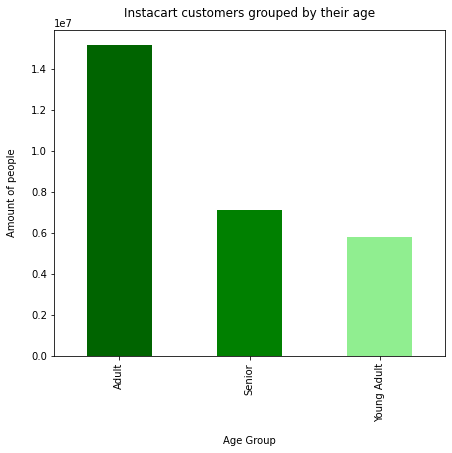

In [21]:
age_group_bar=df['age_group_flag'].value_counts().plot(kind='bar', figsize=(7, 6),color = ['darkgreen', 'green', 'lightgreen'])
plt.title("Instacart customers grouped by their age", y=1.02);
plt.xlabel("Age Group", labelpad=14)
plt.ylabel("Amount of people", labelpad=14)

In [22]:
# Exporting the vizualisation
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','age_group_bar_4.10.png'))

#### Profile: Income Groups

Text(0, 0.5, 'Amount of people')

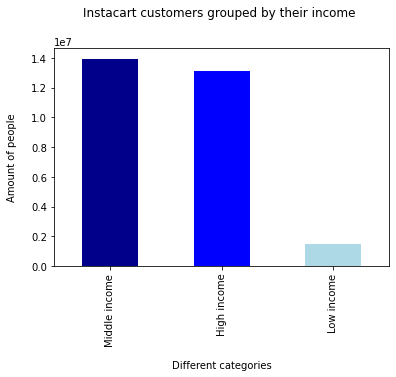

In [23]:
# income bar chart

income_group_bar = df['income_group_flag'].value_counts().plot.bar(color = ['darkblue', 'blue', 'lightblue'])
plt.title("Instacart customers grouped by their income ", y=1.12);
plt.xlabel("Different categories", labelpad=14)
plt.ylabel("Amount of people", labelpad=14)

In [24]:
# Exporting the vizualisation
income_group_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','income_group_bar_4.10.png'))

#### Profile: Family Status

##### Having kids / no kids

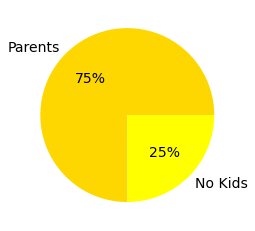

In [26]:
# having kids pie chart

family_kids_pie = df['family_flag'].value_counts().plot.pie(label='', labels=['Parents', 'No Kids'],autopct=('%1.f%%'), colors=['gold','yellow'], textprops={'fontsize': 14})

In [27]:
# Exporting the vizualisation
family_kids_pie.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','family_kids_pie_4.10.png'))

#### Profile: Departments 

##### Family Size

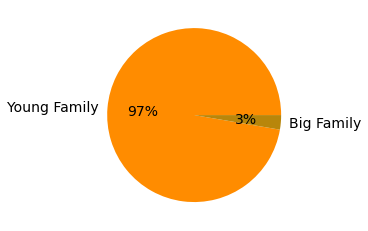

In [30]:
# having kids pie chart

Family_size_pie = df['family_size'].value_counts().plot.pie(label='', labels=['Young Family', 'Big Family'],autopct=('%1.f%%'), colors=['darkorange','darkgoldenrod'], textprops={'fontsize': 14})

In [31]:
# Exporting the vizualisation
Family_size_pie.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','Family_size_pie_4.10.png'))

##### Vegie Purchases / Meat Eater

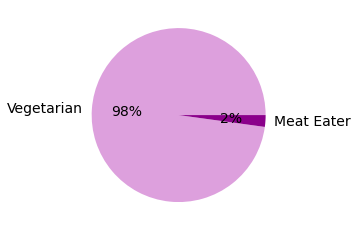

In [32]:
# meat consumption and no meat purchases

meat_pie = df['meat_consumption'].value_counts().plot.pie(label='', labels=['Vegetarian', 'Meat Eater'],autopct=('%1.f%%'), colors=['plum','darkmagenta'], textprops={'fontsize': 14})


In [33]:
# Exporting the vizualisation
meat_pie.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','meat_pie_4.10.png'))

Text(0, 0.5, 'Amount of people')

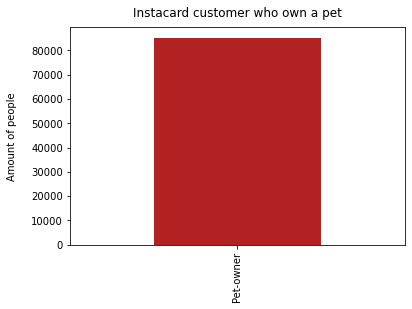

In [34]:
# pet owner bar chart

pet_owner_pie = df['pet_owner_status'].value_counts().plot.bar(color = ['firebrick'])
plt.title("Instacard customer who own a pet", y=1.02);
plt.ylabel("Amount of people", labelpad=14)

In [35]:
# Exporting the vizualisation
pet_owner_pie.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','pet_owner_pie_4.10.png'))

## 7. Aggregation / Customer-Profiles

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [119]:
# loyalty flag and order frequency
df.groupby('loyalty_flag').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                          mean  min   max
loyalty_flag                                             
Loyal customer                        5.239960  0.0  14.0
New customer                         16.464891  0.0  30.0
Regular customer                     10.469952  0.0  30.0

In [120]:
# loyalty flag and prices
df.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal customer    10.333528  1.0  99999.0
New customer      13.131149  1.0  99999.0
Regular customer  12.421761  1.0  99999.0

In [36]:
# age group flag and order frequency 
df.groupby('age_group_flag').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                        mean  min   max
age_group_flag                                         
Adult                               9.490116  0.0  30.0
Senior                              9.463958  0.0  30.0
Young Adult                         9.511136  0.0  30.0

In [37]:
# age group flag and expenditure

df.groupby('age_group_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
age_group_flag                         
Adult           11.876481  1.0  99999.0
Senior          11.552493  1.0  99999.0
Young Adult     12.008244  1.0  99999.0

In [38]:
# income group and usage frequency 

df.groupby('income_group_flag').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                           mean  min   max
income_group_flag                                         
High income                            9.422789  0.0  30.0
Low income                            10.104660  0.0  30.0
Middle income                          9.483175  0.0  30.0

In [39]:
# income group and expenditure

df.groupby('income_group_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                        mean  min      max
income_group_flag                         
High income        16.166072  1.0  99999.0
Low income          6.505987  1.0     25.0
Middle income       8.262166  1.0  99999.0

In [40]:
# family flag and usage frequency 

df.groupby('family_flag').agg({'median_days_since_prior_order': ['mean', 'min', 'max']})

median_days_since_prior_order           
                                     mean  min   max
family_flag                                         
No Kids                          9.452053  0.0  30.0
Parent                           9.499146  0.0  30.0

In [41]:
# family flag and expenditure

df.groupby('family_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
family_flag                         
No Kids      12.102623  1.0  99999.0
Parent       11.706448  1.0  99999.0

## 8. Comparing Customer Profiles with Regions

Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

##### Age and Region

In [90]:
# creating crosstab for age group by region
age_region_bar = pd.crosstab(df['region'], columns = df['age_group_flag'])

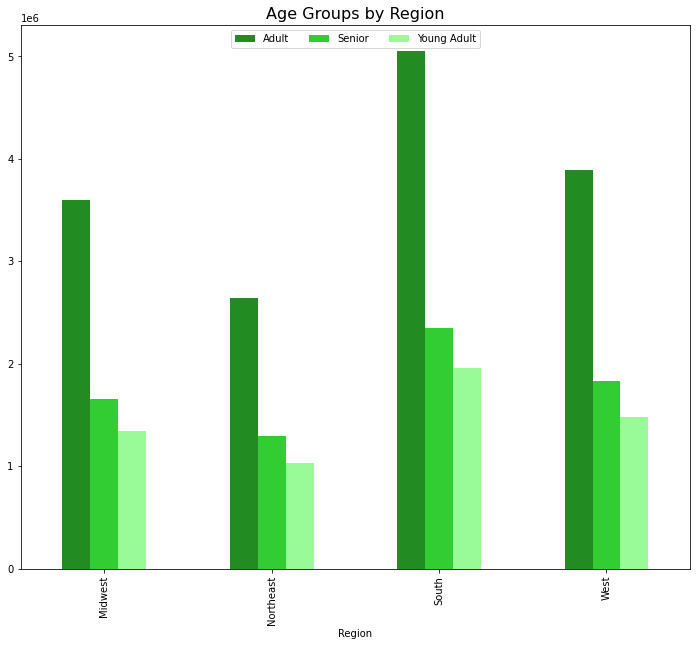

In [91]:
# creating bar chart for age group and region

age_region_bar = age_region_bar.plot(kind ='bar', stacked = False, color = ['forestgreen','limegreen','palegreen'], figsize = (12,10))
plt.title('Age Groups by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 3)
plt.xlabel("Region")
plt.show()

In [45]:
# Exporting the vizualisation
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','age_region_bar_4.10.png'))

##### Income and Region

In [117]:
# creating crosstab for income group by region
income_group_region_bar = pd.crosstab(df['region'], columns = df['income_group_flag'])

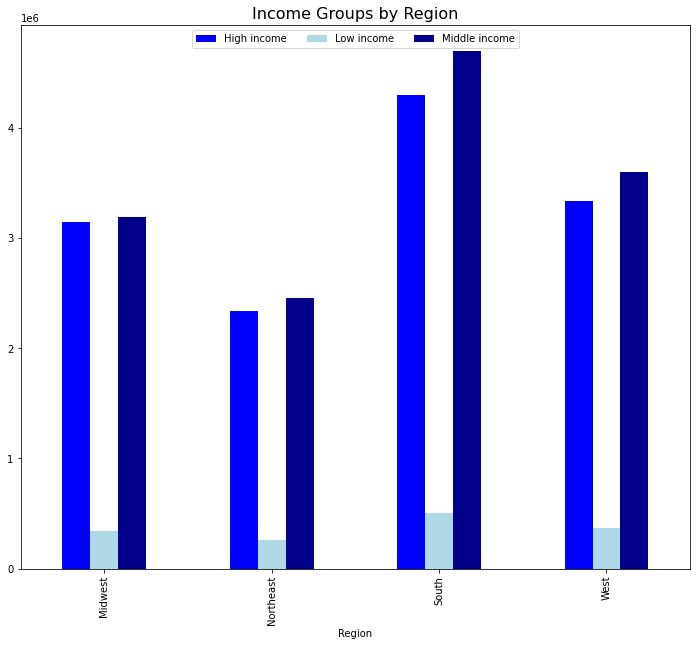

In [118]:
# creating bar chart for income group and region
income_group_region_bar = income_group_region_bar.plot(kind ='bar', stacked = False, color = ['blue','lightblue','darkblue'], figsize = (12,10)),
plt.title('Income Groups by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 3)
plt.xlabel("Region")
plt.show()

In [110]:
# Exporting the vizualisation
income_group_region_bar.figure.savefig(os.path.join(path,'04 Analysis','01 Visualizations','income_region_bar_4.10.png'))

AttributeError: 'tuple' object has no attribute 'figure'

##### Profile: Family Status and Region

In [122]:
# creating crosstab for family status by region
family_status_region_bar = pd.crosstab(df['region'], columns = df['family_flag'])

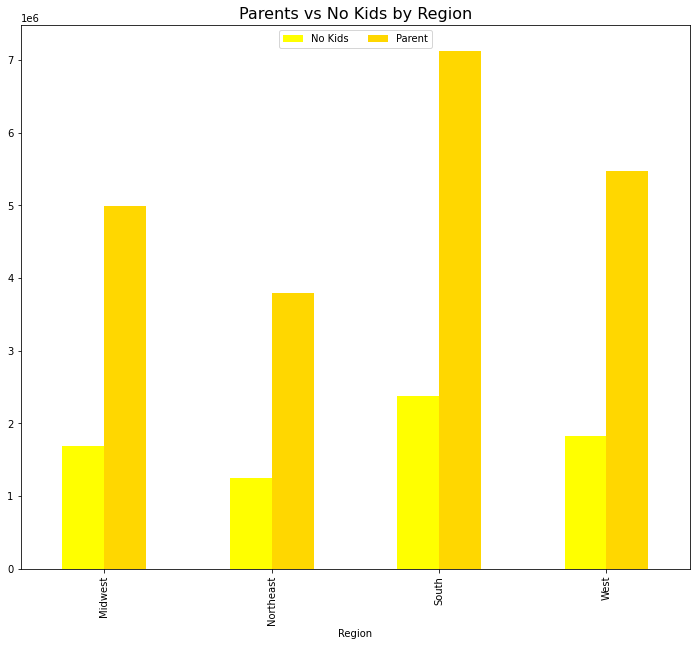

In [123]:
# creating bar chart for family status and region
family_status_region_bar = family_status_region_bar.plot(kind ='bar', stacked = False, color = ['yellow','gold'], figsize = (12,10))
plt.title('Parents vs No Kids by Region', fontsize = 16)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [62]:
# Exporting the vizualisation
family_status_region_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','family_status_region_bar_4.10.png'))

##### Family Size

In [67]:
# creating crosstab for family size by region
family_size_region_bar = pd.crosstab(df['region'], columns = df['family_size'])

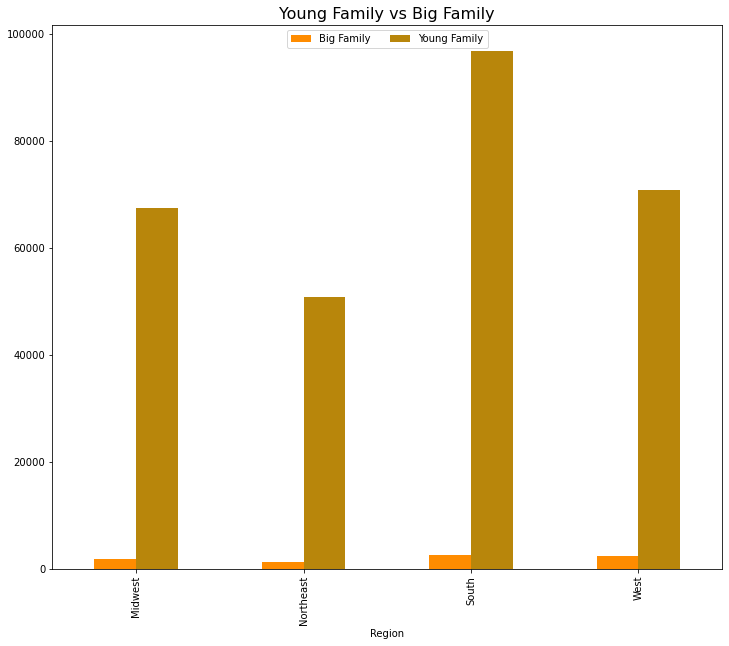

In [69]:
# creating bar chart for family size and region
family_size_region_bar = family_size_region_bar.plot(kind ='bar', stacked = False, color = ['darkorange','darkgoldenrod'], figsize = (12,10))
plt.title('Young Family vs Big Family', fontsize = 16)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [70]:
# Exporting the vizualisation
family_size_region_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','family_size_region_bar_4.10.png'))

##### Meat Consumption

In [79]:
# creating crosstab for meat purchases by region
meat_consumption_region_bar = pd.crosstab(df['region'], columns = df['meat_consumption'])

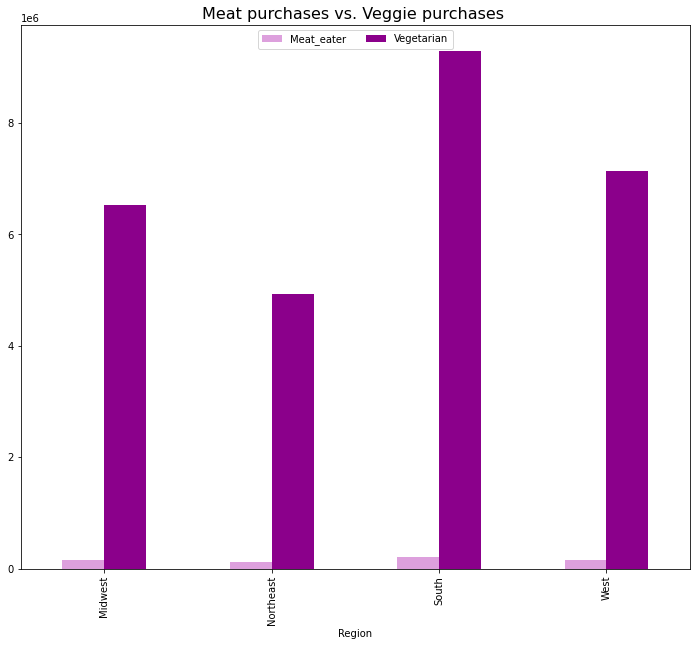

In [81]:
# creating bar chart for family size and region
meat_consumption_region_bar = meat_consumption_region_bar.plot(kind ='bar', stacked = False, color = ['plum','darkmagenta'], figsize = (12,10))
plt.title('Meat purchases vs. Veggie purchases ', fontsize = 16)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [95]:
# Exporting the vizualisation
meat_consumption_region_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','meat_consumption_region_bar_4.10.png'))

##### Pet Owner Status

In [82]:
# creating crosstab for meat purchases by region
pet_owner_region_bar = pd.crosstab(df['region'], columns = df['pet_owner_status'])

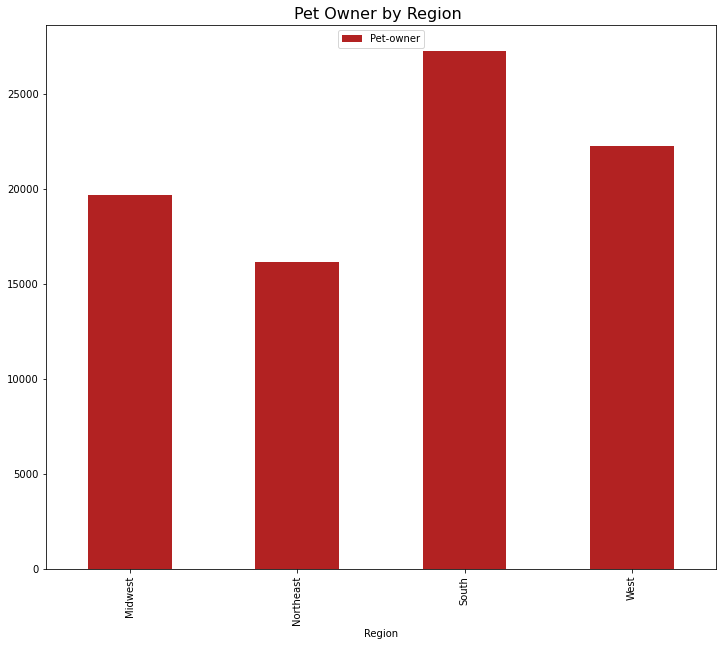

In [97]:
# creating bar chart pet owner by region
pet_owner_region_bar = pet_owner_region_bar.plot(kind ='bar', stacked = False, color = ['firebrick'], figsize = (12,10))
plt.title('Pet Owner by Region ', fontsize = 16)
plt.legend(loc ="upper center", ncol = 2)
plt.xlabel("Region")
plt.show()

In [100]:
# Exporting the vizualisation
pet_owner_region_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','pet_owner_region_bar_4.10.png'))

##### Overall departments 

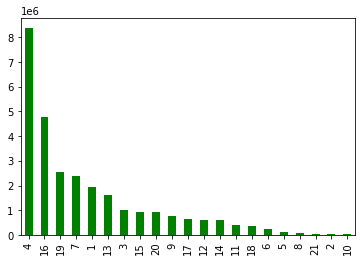

In [103]:
# creating department bar chart
department_bar = df['department_id'].value_counts().plot.bar(color='green')

In [104]:
department_bar.figure.savefig(os.path.join(path, '04 Analysis','01 Visualizations','department_id_bar_4.10.png'))

## 9. Illustration of Results

Done in 6, 7 & 8 